The Ising model has no Hamiltonian given dynammics. Here, I stimulate a kinetic Ising model, where we assume that an associated heat bath generates spin flip $(S_i \rightarrow S_{-i})$.

The model that I simulate is called the Timed ependent Ginzburg-Landau (TDGL) model. The equations for the model are given here: https://rajeshrinet.github.io/blog/2014/ising-model/#TDGL-equation 

In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.sparse import spdiags, linalg, eye

In [7]:
%matplotlib inline

a, b, k = 0, 1.0, 100.0

dh, dt = 1.0, 1e-3
Ng, Tf = 250, 10001




class TDGL():
    """
    Class to solve a PDE
    """
    
    def mu(self, u):
        return a*u + b*u*u*u
    
    def laplacian(self, Ng):
        """
        Construct a sparse matrix that applies the 5-point Laplacian discretization
        """
        e = np.ones(Ng**2)
        e2 = ([1]*(Ng-1) + [0])*Ng
        e3 = ([0] + [1]*(Ng-1))*Ng
        h = dh
        A = spdiags([-4*e, e2, e3, e, e], [0, -1, 1, -Ng, Ng], Ng**2, Ng**2)
        A /= h**2
        return A
    
    
    def integrate(self, L, x, y, u):
        """
        Simulates the equations and plots it at different instants
        """
        
        f = plt.figure(figsize = (15, 15), dpi = 80)
        
        for i in range(Tf):
            u = u - dt*(self.mu(u) - k*L.dot(u))
            
            if i == 0:
                self.configPlot(x, y, u, f, 1, i)
            if i == 1:
                self.configPlot(x, y, u, f, 2, i)
            if i == 10:
                self.configPlot(x, y, u, f, 3, i)
            if i == 100:
                self.configPlot(x, y, u, f, 4, i)
            if i == 1000:
                self.configPlot(x, y, u, f, 5, i)
            if i == 10000:
                self.configPlot(x, y, u, f, 6, i)
            
    
    
    def configPlot(self, x, y, u, f, n_, i):
        U = u.reshape((Ng, Ng))
        sp = f.add_subplot(3, 3, n_)
        plt.setp(sp.get_yticklabels(), visible = False)
        plt.setp(sp.get_xticklabels(), visible = False)
        plt.pcolormesh(x, y, U, cmap=plt.cm.RdBu)
        plt.title("Time = %d"%i)
        plt.axis("tight")
    plt.show()

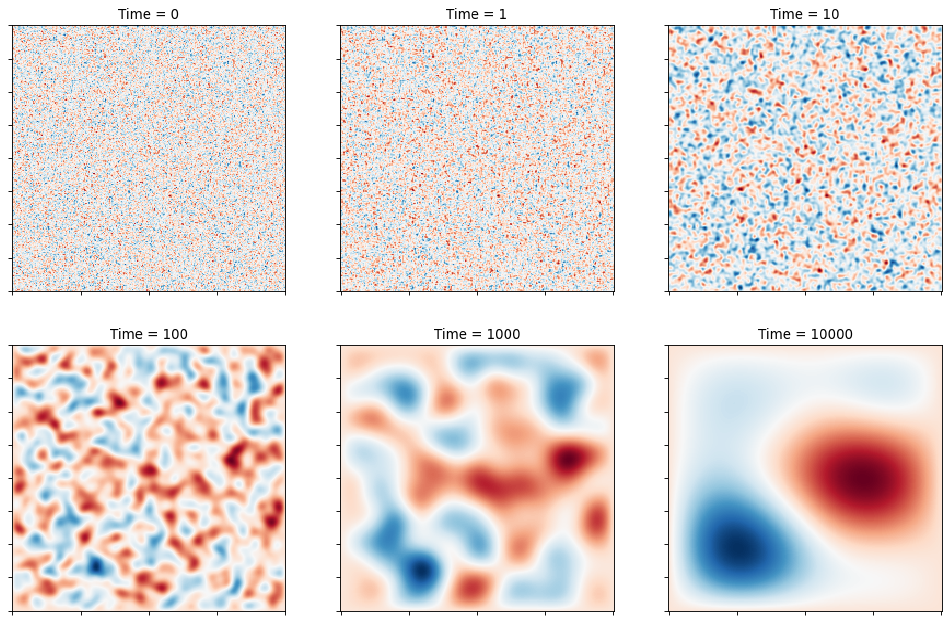

In [8]:
rm = TDGL()    #instantiate the class

#generate the grid and initialise the field
x = np.linspace(-1, 1, Ng)
y = np.linspace(-1, 1, Ng)
X, Y = np.meshgrid(x, y)

u = np.random.randn(Ng*Ng, 1);   #Initial data
L = rm.laplacian(Ng)             #Construct the laplacian
rm.integrate(L, x, y, u)         #Simulate

**Conclusion:** The time evolution of the Monte Carlo simulation  of the Ising model and that of the TDGL equation are similar. The TDGL equation is a hydrodynamic model while the simulation of the Ising model was done at the level of each spins. We still see a similarity of time evolution, as expected!